In [20]:
import kaggle
! kaggle datasets download gauravduttakiit/clickthrough-rate-prediction/ -f ad.csv

Dataset URL: https://www.kaggle.com/datasets/gauravduttakiit/clickthrough-rate-prediction/versions/
License(s): unknown




  0%|          | 0.00/1.10M [00:00<?, ?B/s]
 91%|#########1| 1.00M/1.10M [00:01<00:00, 910kB/s]
100%|##########| 1.10M/1.10M [00:01<00:00, 981kB/s]


In [23]:
import zipfile 
zip_ref = zipfile.ZipFile('ad.csv.zip')
zip_ref.extractall()
zip_ref.close()

In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('ad.csv')
df.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,78.84,30.0,68448.94,161.79,Front-line even-keeled website,Silvaton,Male,Peru,2016-04-04 03:57:48,1
1,60.23,35.0,66815.54,216.24,Front-line fresh-thinking open system,West Jeremyside,Male,Papua New Guinea,2016-06-18 16:02:34,0
2,46.20,49.0,62109.80,135.24,Enhanced maximized access,Lake Vanessa,Male,Chile,2016-06-26 07:01:47,1
3,87.85,31.0,50055.33,134.46,Total zero administration software,Port Sherrystad,Male,French Polynesia,2016-04-18 21:07:28,1
4,64.38,37.0,55121.65,232.54,Devolved regional moderator,South Patrickfort,Female,Bosnia and Herzegovina,2016-07-18 18:33:05,0
5,46.20,24.0,56194.56,178.85,Persistent fault-tolerant service-desk,Hughesport,Female,Kazakhstan,2016-05-10 17:13:47,0
6,66.18,60.0,60575.99,151.54,Polarized tangible collaboration,Shelbyport,Male,United Arab Emirates,2016-01-16 23:37:51,1
7,44.72,21.0,61009.10,226.54,Advanced disintermediate data-warehouse,Williamsside,Male,Eritrea,2016-07-17 18:55:38,0
8,79.81,31.0,48867.36,127.83,Polarized 5thgeneration matrix,New Gabriel,Female,Jersey,2016-05-23 00:32:54,0
9,66.01,23.0,52182.23,108.27,Realigned zero tolerance emulation,Port Cassie,Female,Chad,2016-06-01 09:27:34,1


In [28]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [29]:
df.duplicated().sum()

2237

In [30]:
df.drop_duplicates(inplace=True)

In [31]:
df.duplicated().sum()

0

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47763 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  47763 non-null  float64
 1   Age                       47763 non-null  float64
 2   Area Income               47763 non-null  float64
 3   Daily Internet Usage      47763 non-null  float64
 4   Ad Topic Line             47763 non-null  object 
 5   City                      47763 non-null  object 
 6   Gender                    47763 non-null  object 
 7   Country                   47763 non-null  object 
 8   Timestamp                 47763 non-null  object 
 9   Clicked on Ad             47763 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 4.0+ MB


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,47763.0,64.046320,14.839415,32.60,49.84,66.63,76.44,91.37
Age,47763.0,35.953793,8.836320,19.00,29.00,35.00,41.00,60.00
Area Income,47763.0,53946.852619,11501.568037,13996.50,47575.44,56180.93,63100.13,79332.33
Daily Internet Usage,47763.0,174.161263,42.133065,104.78,135.67,167.67,213.75,269.96
Clicked on Ad,47763.0,0.508636,0.499931,0.00,0.00,1.00,1.00,1.00


In [34]:
df.describe(include='object',exclude='float').T

,count,unique,top,freq
Ad Topic Line,47763,677,Decentralized client-driven data-warehouse,2265
City,47763,638,Williamsside,1620
Gender,47763,2,Female,25212
Country,47763,223,Peru,2382
Timestamp,47763,723,2016-04-07 20:34:42,2298


C:\Users\jeeva\AppData\Local\Temp\ipykernel_7684\552927999.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


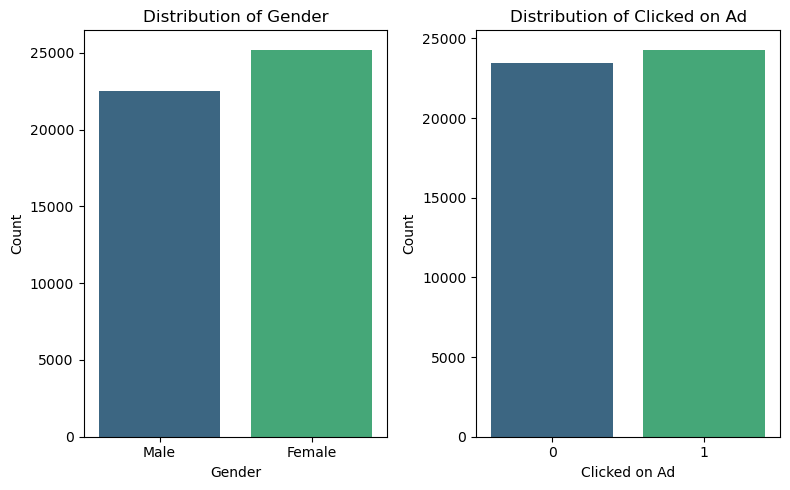

In [78]:
co = df[['Gender','Clicked on Ad']]
plt.figure(figsize=(8,5))

for i, col in enumerate(co):
    plt.subplot(1, 2, i + 1)
    sns.countplot(data=df, x=col,palette='viridis')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()

plt.show()

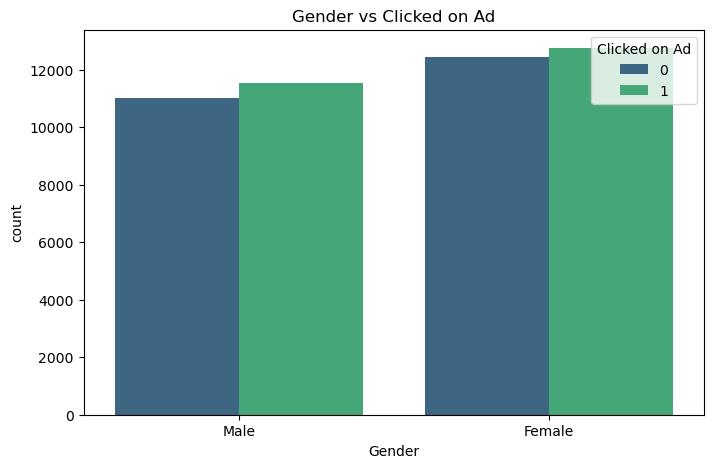

In [79]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Gender'], hue='Clicked on Ad',data = df,palette='viridis')
plt.title('Gender vs Clicked on Ad')
plt.show()

C:\Users\jeeva\AppData\Local\Temp\ipykernel_7684\656066327.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\jeeva\AppData\Local\Temp\ipykernel_7684\656066327.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\jeeva\AppData\Local\Temp\ipykernel_7684\656066327.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


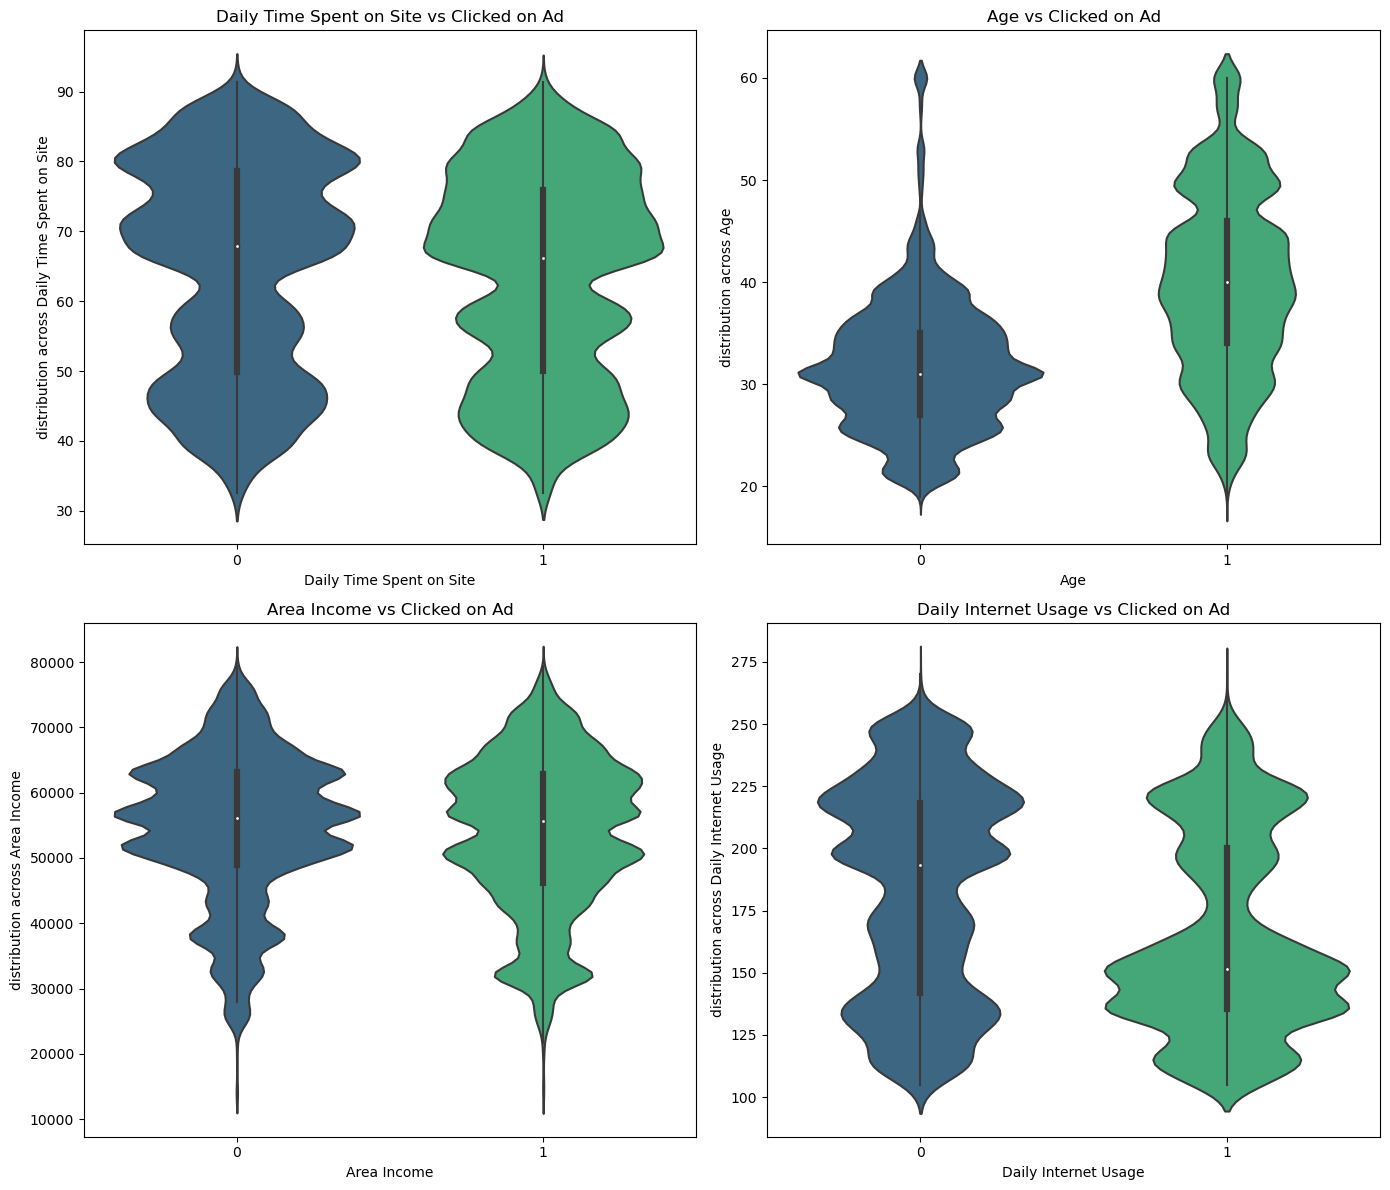

In [80]:
tar_col = df[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']]
plt.figure(figsize=(14, 12))

for i,col in enumerate(tar_col):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x='Clicked on Ad', y=col, data=df,palette='viridis')
    plt.title(f'{col} vs Clicked on Ad')
    plt.xlabel(col)
    plt.ylabel(f'distribution across {col}')
    plt.tight_layout()
plt.show()

C:\Users\jeeva\AppData\Local\Temp\ipykernel_7684\1343392369.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\jeeva\AppData\Local\Temp\ipykernel_7684\1343392369.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\jeeva\AppData\Local\Temp\ipykernel_7684\1343392369.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


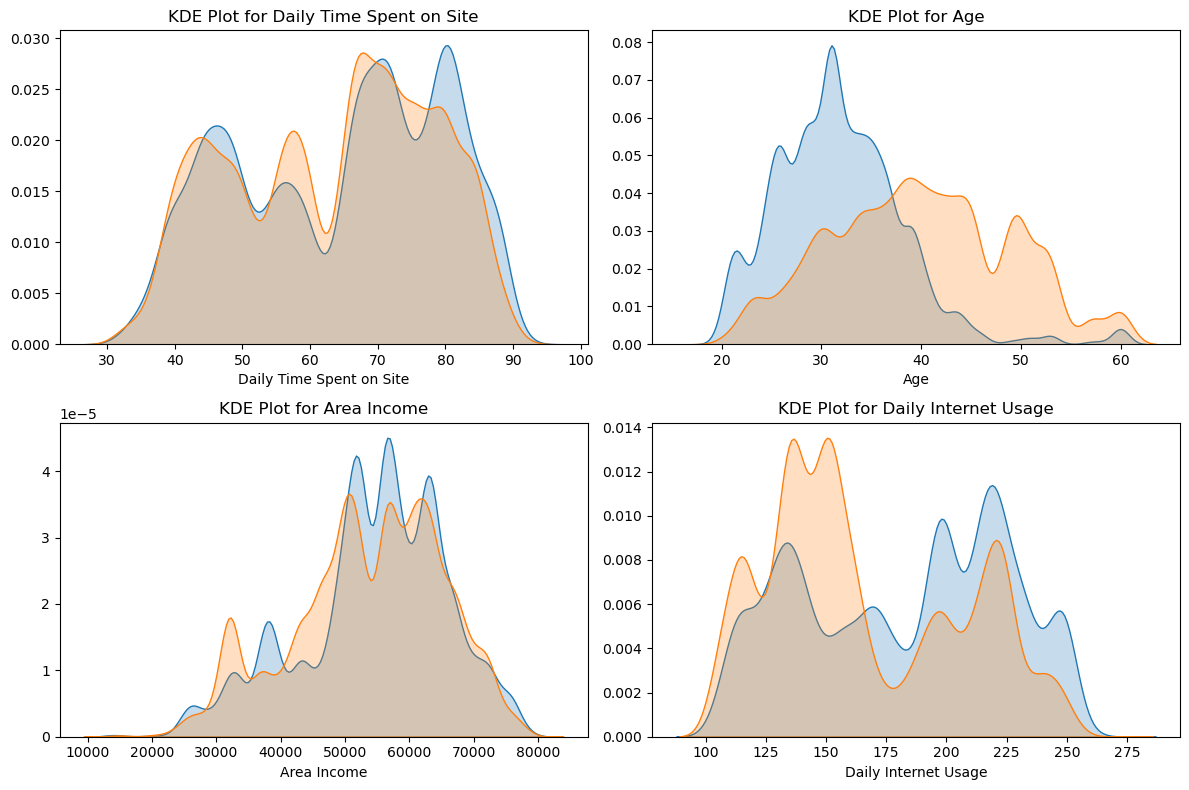

In [81]:
num_col = df.select_dtypes(float,int)
plt.figure(figsize=(12,8))

for i, col in enumerate(num_col):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(data=df[df['Clicked on Ad'] == 0][col], fill=True, label='Not Clicked')
    sns.kdeplot(data=df[df['Clicked on Ad'] == 1][col], fill=True, label='Clicked')
    plt.title(f"KDE Plot for {col}")
    plt.xlabel(col)
    plt.ylabel("")
    plt.tight_layout()

plt.show()

In [35]:
import pycountry_convert as pc

def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except KeyError:
        if country_name == 'Western Sahara':
            return 'Africa'
        elif country_name == 'Korea':
            return 'Asia'
        elif country_name == 'Netherlands Antilles':
            return 'South America'
        elif country_name == 'Palestinian Territory':
            return 'Asia'
        elif country_name == "Cote d'Ivoire":
            return 'Africa'
        elif country_name == 'Libyan Arab Jamahiriya':
            return 'Africa'
        elif country_name == 'Timor-Leste':
            return 'Asia'
        elif country_name == 'Bouvet Island (Bouvetoya)':
            return 'Antarctica'
        else:
            return 'Unknown'

countries = df['Country'].values.tolist()
continents = []
for i in range(len(countries)):
    continents.append(country_to_continent(countries[i]))




In [36]:
c = pd.DataFrame(np.array(continents))
c.value_counts()

Africa           12023
Asia              9277
Europe            8538
North America     8396
Oceania           4430
South America     4402
Unknown            370
Antarctica         327
Name: count, dtype: int64

In [37]:
df['Continents'] = continents
df.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,Continents
0,78.84,30.0,68448.94,161.79,Front-line even-keeled website,Silvaton,Male,Peru,2016-04-04 03:57:48,1,South America
1,60.23,35.0,66815.54,216.24,Front-line fresh-thinking open system,West Jeremyside,Male,Papua New Guinea,2016-06-18 16:02:34,0,Oceania
2,46.20,49.0,62109.80,135.24,Enhanced maximized access,Lake Vanessa,Male,Chile,2016-06-26 07:01:47,1,South America
3,87.85,31.0,50055.33,134.46,Total zero administration software,Port Sherrystad,Male,French Polynesia,2016-04-18 21:07:28,1,Oceania
4,64.38,37.0,55121.65,232.54,Devolved regional moderator,South Patrickfort,Female,Bosnia and Herzegovina,2016-07-18 18:33:05,0,Europe
5,46.20,24.0,56194.56,178.85,Persistent fault-tolerant service-desk,Hughesport,Female,Kazakhstan,2016-05-10 17:13:47,0,Asia
6,66.18,60.0,60575.99,151.54,Polarized tangible collaboration,Shelbyport,Male,United Arab Emirates,2016-01-16 23:37:51,1,Asia
7,44.72,21.0,61009.10,226.54,Advanced disintermediate data-warehouse,Williamsside,Male,Eritrea,2016-07-17 18:55:38,0,Africa
8,79.81,31.0,48867.36,127.83,Polarized 5thgeneration matrix,New Gabriel,Female,Jersey,2016-05-23 00:32:54,0,Europe
9,66.01,23.0,52182.23,108.27,Realigned zero tolerance emulation,Port Cassie,Female,Chad,2016-06-01 09:27:34,1,Africa


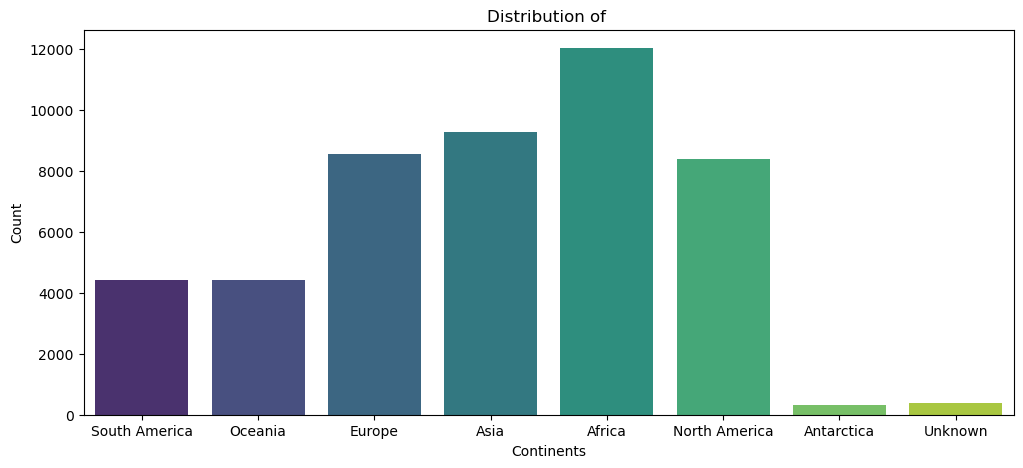

In [38]:
plt.figure(figsize=(12,5))
sns.countplot( x=df['Continents'],palette='viridis')
plt.title(f"Distribution of ")
plt.xlabel('Continents')
plt.ylabel("Count")
plt.show()

In [39]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [40]:
df['hour'] = df['Timestamp'].dt.hour # 0 - 23 Hours
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek # mon = 0 to sun = 6
df['Month'] = df['Timestamp'].dt.month # Data from Jan to Jul

In [41]:
weekends =  [ 1 if j == 'Saturday' or j == 'Sunday' else 0 for i,j in enumerate(df['Timestamp'].dt.day_name()) ]

df['weekends'] = weekends

C:\ProgramData\anaconda3\anaconda4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


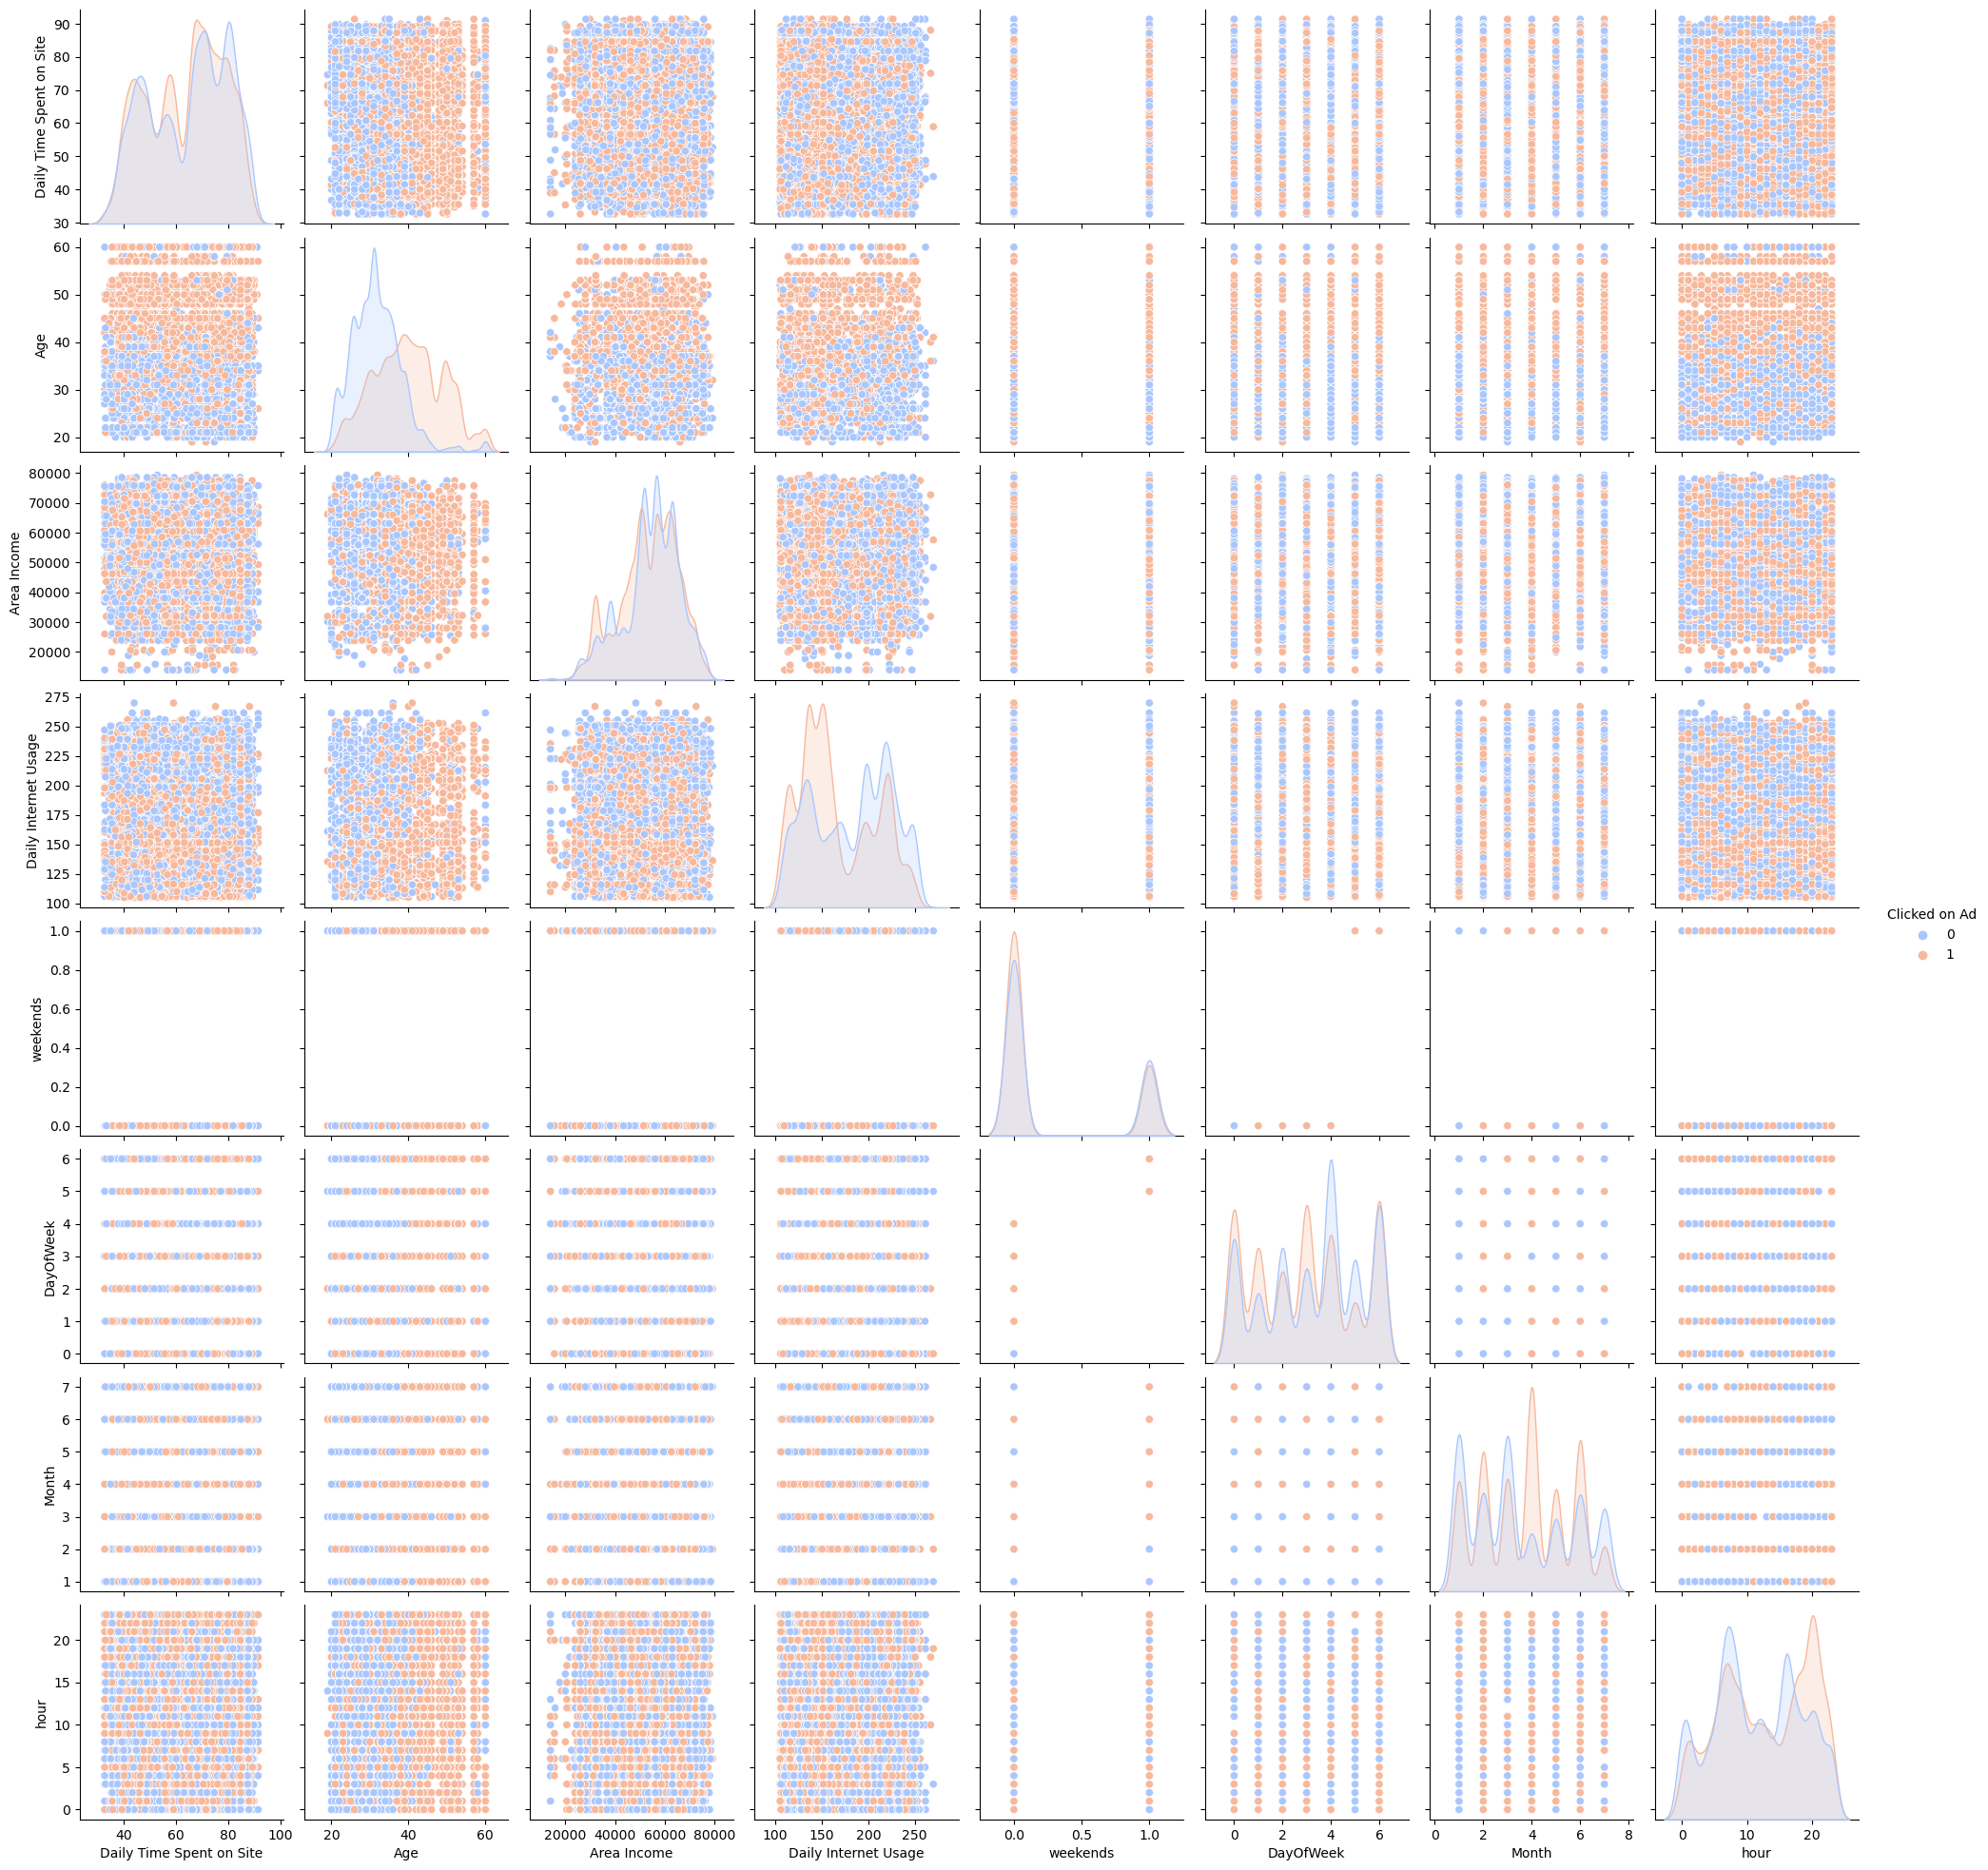

In [238]:
sns.pairplot(df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Clicked on Ad','weekends','DayOfWeek','Month','hour']], 
             hue='Clicked on Ad', palette='coolwarm')
plt.show()

In [42]:
df_copy = df.copy()

In [43]:
from sklearn.preprocessing import OrdinalEncoder
oc = OrdinalEncoder()

x = oc.fit_transform(df_copy)
df_copy = pd.DataFrame(x, columns=df_copy.columns)
df_copy

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,Continents,hour,DayOfWeek,Month,weekends
0,464.0,11.0,563.0,275.0,203.0,508.0,1.0,153.0,360.0,1.0,6.0,3.0,0.0,3.0,0.0
1,230.0,16.0,531.0,500.0,205.0,594.0,1.0,151.0,617.0,0.0,5.0,16.0,5.0,5.0,1.0
2,115.0,30.0,430.0,158.0,148.0,277.0,1.0,38.0,640.0,1.0,6.0,7.0,6.0,5.0,1.0
3,588.0,12.0,200.0,153.0,606.0,461.0,1.0,66.0,414.0,1.0,5.0,21.0,0.0,3.0,0.0
4,262.0,18.0,298.0,586.0,119.0,536.0,0.0,25.0,706.0,0.0,3.0,18.0,0.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47758,195.0,18.0,471.0,98.0,340.0,161.0,1.0,101.0,250.0,1.0,2.0,23.0,6.0,2.0,1.0
47759,451.0,23.0,400.0,208.0,99.0,50.0,1.0,120.0,640.0,1.0,3.0,7.0,6.0,5.0,1.0
47760,36.0,14.0,234.0,557.0,600.0,125.0,0.0,106.0,188.0,1.0,2.0,23.0,2.0,1.0,0.0
47761,411.0,17.0,220.0,509.0,144.0,616.0,1.0,159.0,592.0,1.0,2.0,11.0,6.0,5.0,1.0


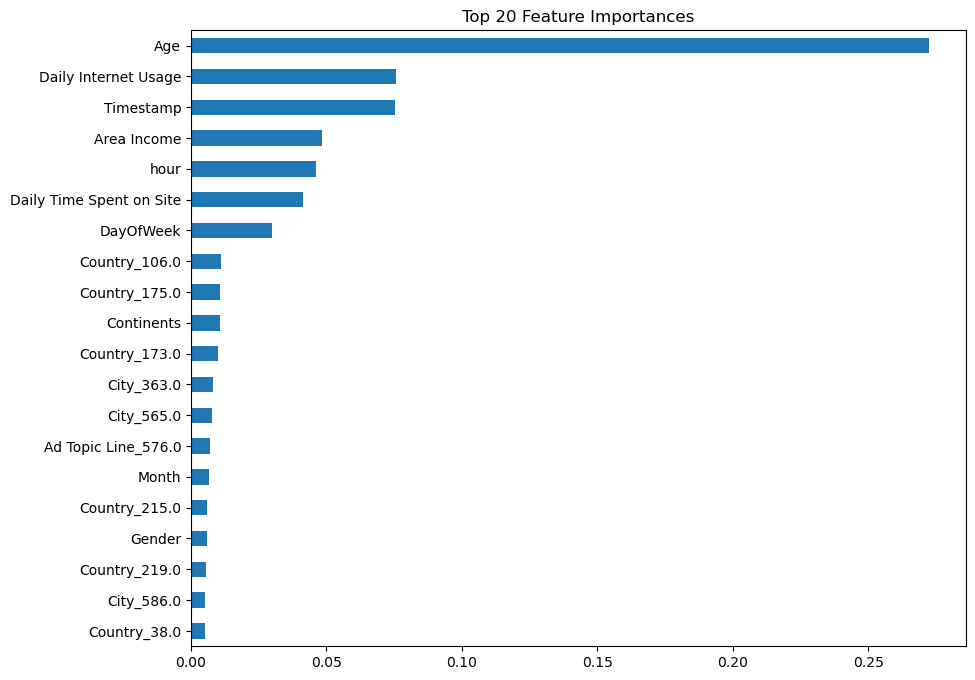

In [44]:
from sklearn.tree import DecisionTreeClassifier


# Convert categorical variables to dummy/indicator variables (One Hot Encoding)
categorical_features = ['Ad Topic Line', 'City', 'Country']
data_encoded = pd.get_dummies(df_copy, columns=categorical_features,dtype=int)

# Prepare features and target with the encoded dataset
X = data_encoded.drop(['Clicked on Ad',], axis=1)
y = df_copy['Clicked on Ad']

# Initialize and fit Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X, y)

# Get feature importances and convert to a Series
feature_importances = pd.Series(tree.feature_importances_, index=X.columns)

# Sort the feature importances in descending order and slice the top 20
top_features = feature_importances.sort_values(ascending=False)[:20]

# Plotting
plt.figure(figsize=(10, 8))
top_features.plot(kind='barh',)  # Horizontal bar plot
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()  # Invert the y-axis to have the most important at the top
plt.show()

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score,roc_curve

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.30)

In [47]:
ss = StandardScaler()
X_train.iloc[:,0:4] = ss.fit_transform(X_train.iloc[:,0:4])
X_test.iloc[:,0:4] = ss.transform(X_test.iloc[:,0:4])

In [48]:
rf = RandomForestClassifier()

rf.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
y_pred = rf.predict(X_test)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90      6979
         1.0       0.91      0.90      0.90      7350

    accuracy                           0.90     14329
   macro avg       0.90      0.90      0.90     14329
weighted avg       0.90      0.90      0.90     14329



In [51]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

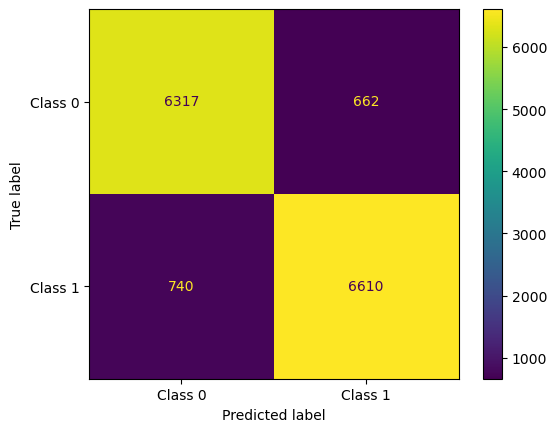

In [52]:
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])

# Plot the confusion matrix
display.plot()
plt.show()

In [53]:
n_estimators = [90,100,110,120] # number of trees in the random forest
max_features = ['log2', 'sqrt'] # number of features in consideration at every split
max_depth = [80,100,120,140] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 4, 6, 8, 10] # minimum sample number to split a node
min_samples_leaf = [1, 2, 3] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [54]:
# Importing randomized CV 
from sklearn.model_selection import RandomizedSearchCV

rf2 = RandomForestClassifier(random_state=2)
rf_random = RandomizedSearchCV(estimator = rf2,param_distributions = random_grid,
               n_iter = 100, cv = 3, random_state=35, n_jobs = -1 )

In [55]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [80, 100, 120, 140],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [90, 100, 110, 120]},
                   random_state=35, return_train_score=True, verbose=1)

In [57]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [90, 100, 110, 120], 'max_features': ['log2', 'sqrt'], 'max_depth': [80, 100, 120, 140], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [1, 2, 3], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 110, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 120, 'bootstrap': False}  



In [63]:
random_forest = RandomForestClassifier(n_estimators =110 , min_samples_split =8 , min_samples_leaf= 1, max_features = 'log2', max_depth= 120, bootstrap=False) 
random_forest.fit( X_train, y_train) 

RandomForestClassifier(bootstrap=False, max_depth=120, max_features='log2',
                       min_samples_split=8, n_estimators=110)

In [64]:
# predictions
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.90      0.91      6979
         1.0       0.91      0.91      0.91      7350

    accuracy                           0.91     14329
   macro avg       0.91      0.91      0.91     14329
weighted avg       0.91      0.91      0.91     14329



In [65]:
r2 = random_forest.score(X_test, y_test)
adjusted_r2 = 1 - (1 - random_forest.score(X_test, y_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print("Adjusted R-squared:", adjusted_r2)
print("R2 score: ",r2)
print('R2 difference',adjusted_r2 - r2)

Adjusted R-squared: 0.8975734684403948
R2 score:  0.9086468001954079
R2 difference -0.011073331755013127


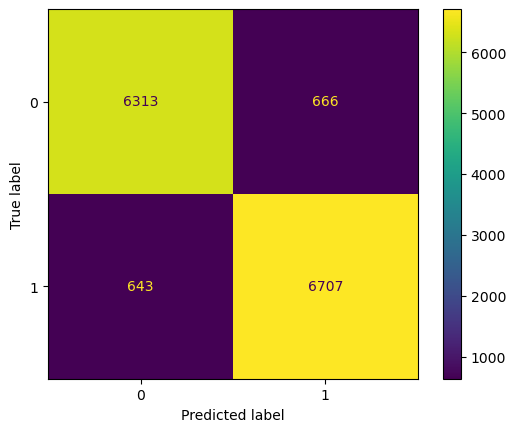

In [66]:
cm = confusion_matrix(y_test,y_pred)

dip = ConfusionMatrixDisplay(confusion_matrix=cm)
dip.plot()
plt.show()

AUC-ROC Score:0.9085439311130671


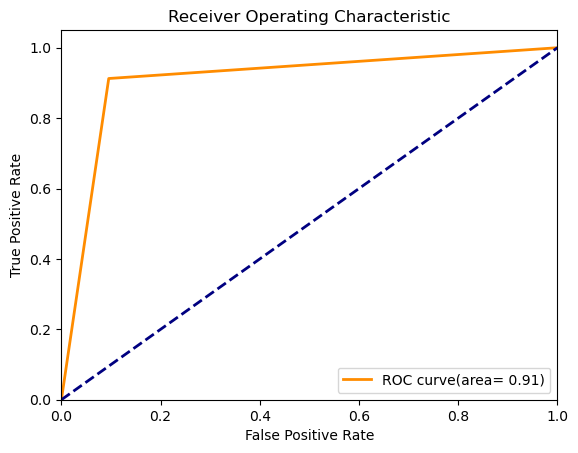

In [67]:
auc_roc = roc_auc_score(y_test,y_pred)
print(f'AUC-ROC Score:{auc_roc}')

# step 6 : plot ROC curve
fpr,tpr,_ = roc_curve(y_test,y_pred)
# Calculates the FPR and TPR
# at various threshold settings for the given y_test(actual)
# and y_predict(predicted probabilities or scores).

plt.figure()
# creates a new figure for the plot

plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve(area= %0.2f)'%auc_roc)
# plots the roc curve using  the FPR (x-axis) and TPR(y-axis) values
# color
#lw = line width = 2
# label = auc-roc adds a label to the curve
# showing the AUC -ROC score.

plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
# plot a diagonal line from(0,0), to (1,1)representing
# the roc curve of a purely random classifier.


plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])

#sets the limits for the x-axis and y-axis representively.
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()